In [12]:
# Install required libraries
!pip install nltk spacy

# Download required data
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')


# Download spaCy model
!python -m spacy download en_core_web_sm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 108.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
sample_text = """
In 2024, Google announced a major breakthrough in quantum computing.
This new technology could revolutionize industries such as finance, healthcare, and artificial intelligence.
Meanwhile, Apple Inc. opened its first store in Nepal, attracting huge crowds.
"""


In [3]:
import string
import re

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

cleaned_text = clean_text(sample_text)
print("Cleaned Text:\n", cleaned_text)


Cleaned Text:
 in google announced a major breakthrough in quantum computing this new technology could revolutionize industries such as finance healthcare and artificial intelligence meanwhile apple inc opened its first store in nepal attracting huge crowds


In [6]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Sentence Tokenization
sentences = sent_tokenize(cleaned_text)
print("\nSentences:", sentences)

# Word Tokenization
words = word_tokenize(cleaned_text)
print("\nWords:", words)



Sentences: ['in google announced a major breakthrough in quantum computing this new technology could revolutionize industries such as finance healthcare and artificial intelligence meanwhile apple inc opened its first store in nepal attracting huge crowds']

Words: ['in', 'google', 'announced', 'a', 'major', 'breakthrough', 'in', 'quantum', 'computing', 'this', 'new', 'technology', 'could', 'revolutionize', 'industries', 'such', 'as', 'finance', 'healthcare', 'and', 'artificial', 'intelligence', 'meanwhile', 'apple', 'inc', 'opened', 'its', 'first', 'store', 'in', 'nepal', 'attracting', 'huge', 'crowds']


In [7]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Before and after comparison
words_before = words
words_after = [w for w in words_before if w not in stop_words]

print("\nAfter Stopword Removal:", words_after)
print(f"\nWord count before: {len(words_before)}, after: {len(words_after)}")
print(f"Unique words before: {len(set(words_before))}, after: {len(set(words_after))}")



After Stopword Removal: ['google', 'announced', 'major', 'breakthrough', 'quantum', 'computing', 'new', 'technology', 'could', 'revolutionize', 'industries', 'finance', 'healthcare', 'artificial', 'intelligence', 'meanwhile', 'apple', 'inc', 'opened', 'first', 'store', 'nepal', 'attracting', 'huge', 'crowds']

Word count before: 34, after: 25
Unique words before: 32, after: 25


In [10]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Before and after comparison
words_before = words
words_after = [w for w in words_before if w not in stop_words]

print("\nAfter Stopword Removal:", words_after)
print(f"\nWord count before: {len(words_before)}, after: {len(words_after)}")
print(f"Unique words before: {len(set(words_before))}, after: {len(set(words_after))}")



After Stopword Removal: ['google', 'announced', 'major', 'breakthrough', 'quantum', 'computing', 'new', 'technology', 'could', 'revolutionize', 'industries', 'finance', 'healthcare', 'artificial', 'intelligence', 'meanwhile', 'apple', 'inc', 'opened', 'first', 'store', 'nepal', 'attracting', 'huge', 'crowds']

Word count before: 34, after: 25
Unique words before: 32, after: 25


In [9]:
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Select 10 sample words (after stopword removal)
sample_words = words_after[:10]

print("\nOriginal | Stemmed | Lemmatized")
for word in sample_words:
    print(f"{word} | {stemmer.stem(word)} | {lemmatizer.lemmatize(word)}")



Original | Stemmed | Lemmatized
google | googl | google
announced | announc | announced
major | major | major
breakthrough | breakthrough | breakthrough
quantum | quantum | quantum
computing | comput | computing
new | new | new
technology | technolog | technology
could | could | could
revolutionize | revolution | revolutionize


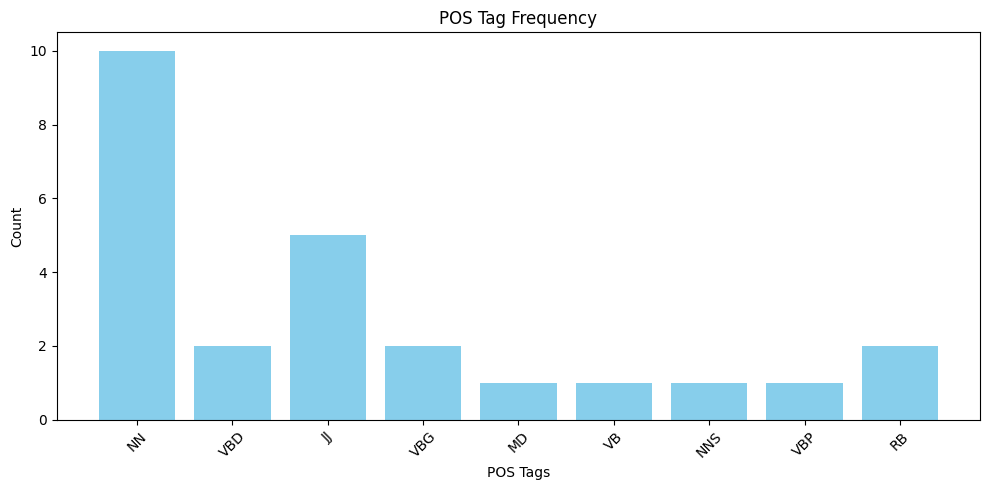

In [13]:
from nltk import pos_tag
import matplotlib.pyplot as plt
from collections import Counter

# POS tagging
pos_tags = pos_tag(words_after)

# Count POS tags
pos_counts = Counter(tag for word, tag in pos_tags)

# Bar Plot
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title("POS Tag Frequency")
plt.xlabel("POS Tags")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
import spacy
from spacy import displacy

# Load English NLP model
nlp = spacy.load("en_core_web_sm")
doc = nlp(sample_text)

# Extract entities
print("\nNamed Entities:\n")
for ent in doc.ents:
    print(ent.text, "-", ent.label_)

# Display with displacy (only works in Colab's output cell)
displacy.render(doc, style="ent", jupyter=True)



Named Entities:

2024 - DATE
Google - ORG
Apple Inc. - ORG
first - ORDINAL
Nepal - GPE
